In [1]:
import datetime as dt
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
from define.randchans import RandomPauliChannel
from define.QECCLfid import uncorrectable as uc
from define import qcode as qc
from define import fnames as fn
from define import globalvars as gv
import matplotlib
matplotlib.use("Agg")
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
qcode = qc.QuantumErrorCorrectingCode("Steane")
qc.Load(qcode)

In [12]:
mu = np.mean(qcode.weightdist[qcode.PauliCorrectableIndices])/2
np.random.normal(mu,0.5)

2.4070318512702387

In [13]:
# plt.plot(np.arange(8),poisson.pmf(np.arange(8), 0),0.1**np.arange(10),marker="o",linestyle="None")

In [14]:
# probs = poisson.pmf(qcode.weightdist, np.abs(np.random.normal(mu,mu/3)))
# plt.plot(np.sort(qcode.weightdist), probs[np.argsort(qcode.weightdist)],marker="o",linestyle="None")
# plt.plot(np.sort(qcode.weightdist), (1/7)**np.sort(qcode.weightdist),marker="x",linestyle="None")
# plt.yscale('log')

In [15]:
errdist = RandomPauliChannel({"method":1, "mu":mu, "weightdist":qcode.weightdist})

In [16]:
infid = 0.2
errdist[0] = 1 - infid
errdist[1:] = infid * errdist[1:]/np.sum(errdist[1:])

In [17]:
errdist

array([8.00000000e-01, 9.43092782e-05, 3.15521095e-05, ...,
       4.85745570e-06, 4.17286601e-06, 1.47666598e-06])

In [18]:
PauliDistributionPlot(errdist, qcode, nreps=5, max_weight=3)

In [ ]:
for w in range(np.max(qcode.weightdist)+1):
    print("Total probability of weight {} errors = {}:\n{}".format(w, np.sum(errdist[qcode.weightdist==w]), errdist[qcode.weightdist==w]))

In [10]:
def PauliDistributionPlot(pauliprobs, qcode, nreps=5, max_weight=None):
    r"""
    Plot the probability distribution of Pauli errors.
    """
    if max_weight is None:
        max_weight = int(np.max(qcode.weightdist))
    max_weight += 1
    group_by_weight = {w: None for w in range(max_weight)}
    for w in range(max_weight):
        (group_by_weight[w],) = np.nonzero(qcode.weightdist == w)
    leading_by_weight = {w: None for w in range(max_weight)}
    for w in range(max_weight):
        ninclude = min(nreps, group_by_weight[w].size)
        result_args = np.argpartition(-pauliprobs[group_by_weight[w]], ninclude - 1)[
            :ninclude
        ]
        leading_by_weight[w] = group_by_weight[w][result_args]
    operator_labels = {
        w: qc.PauliOperatorToSymbol(
            qc.GetOperatorsForLSTIndex(qcode, leading_by_weight[w])
        )
        for w in range(max_weight)
    }
    plotfname = ("test.pdf")
    with PdfPages(plotfname) as pdf:
        fig = plt.figure(figsize=gv.canvas_size)
        current = 0
        for w in range(1, max_weight):
            if leading_by_weight[w].size > 0:
                plt.bar(
                    np.arange(current, current + leading_by_weight[w].size),
                    pauliprobs[leading_by_weight[w]],
                    color=gv.Colors[w % gv.n_Colors],
                    width=0.5,
                    label="w = %d" % (w),
                    alpha=0.6,
                )
                current = current + leading_by_weight[w].size
        # Principal axes labels
        ax = plt.gca()
        # ax.set_xlabel("Errors", fontsize=gv.axes_labels_fontsize)
        # locs, labels = xticks()
        # xticks(np.arange(0, 1, step=0.2))
        plt.xticks(
            np.arange(sum([len(operator_labels[w]) for w in range(1, max_weight)])),
            [label for label in operator_labels[w] for w in range(max_weight)],
            rotation=45,
        )
        ax.set_ylabel("Probabilities", fontsize=gv.axes_labels_fontsize)
        ax.set_yscale("log")
        ax.tick_params(
            axis="both",
            which="both",
            pad=gv.ticks_pad,
            direction="inout",
            length=gv.ticks_length,
            width=gv.ticks_width,
            labelsize=gv.ticks_fontsize,
        )
        # Legend
        ax.legend(
            numpoints=1,
            loc=1,
            shadow=True,
            fontsize=gv.legend_fontsize,
            markerscale=gv.legend_marker_scale,
        )
        # Save the plot
        pdf.savefig(fig)
        plt.close()
        # Set PDF attributes
        pdfInfo = pdf.infodict()
        pdfInfo["Title"] = "Pauli distribution of errors."
        pdfInfo["Author"] = "Pavithran Iyer"
        pdfInfo["ModDate"] = dt.datetime.today()
    return None

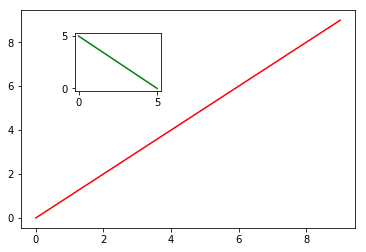

In [19]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.25, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

ax1.plot(range(10), color='red')
ax2.plot(range(6)[::-1], color='green')

plt.show()

In [74]:
from mpl_toolkits.axes_grid.inset_locator import (
        inset_axes,
        InsetPosition,
        mark_inset,
    )

In [125]:
def Inset(ax1, ax2):
    # Inset one into another.
    fig = plt.figure()
    ax3 = fig.add_axes(ax1)
    ax4 = fig.add_axes(ax2)
    #ip = InsetPosition(ax1, [0.1, 0.67, 0.33, 0.3])
    #ax2.set_axes_locator(ip)
    #mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none")
    return ax4.figure

In [133]:
def Lplot(xdata, ydata):
    fig = plt.figure()
    ax = plt.gca()
    ax.plot(xdata,ydata,color="red",marker="o")
    ax.set_xlabel("This is physical metric")
    ax.set_ylabel("This is logical metric")
    plt.close()
    return ax,fig
def ImprovePlot(xdata, ydata):
    fig = plt.figure()
    ax = plt.gca()
    ax.plot(xdata,ydata,color="green",marker="*")
    ax.set_xlabel("This is physical metric")
    ax.set_ylabel("This is improvement")
    ax = plt.gca()
    plt.close()
    return ax,fig

In [134]:
lplot_X = np.random.randint(0,10,size=(10,))
lplot_Y = np.random.randint(0,10,size=(10,))
imp_X = np.random.randint(0,10,size=(10,))
imp_Y = np.random.randint(0,10,size=(10,))

In [135]:
ax1,fig1 = Lplot(lplot_X, lplot_Y)
ax2,fig2 = ImprovePlot(imp_X, imp_Y)

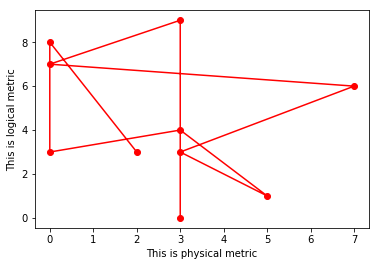

In [137]:
fig1

In [148]:
fig3=fig2.add_gridspec(ax1,3)

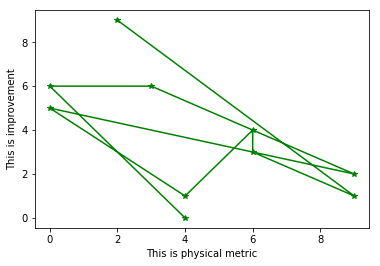

In [149]:
fig3.figure

In [131]:
Inset(ax1,ax2)

ValueError: The Axes must have been created in the present figure

<Figure size 432x288 with 0 Axes>

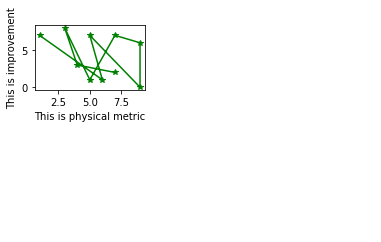

In [94]:
ax4.figure

In [86]:
fig = plt.figure()
ax5 = fig.add_axes(ax3)
ax6 = fig.add_axes(ax4) # inset axes

ValueError: The Axes must have been created in the present figure

<Figure size 432x288 with 0 Axes>